# Aggregate Analysis Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1 - Coefficient of Variation vs. MAPE

In [4]:
# extracting data - using GSN data and MAPE collected through the neural network model
data = pd.read_csv('data/CVvMAPE.csv', index_col='species')

data.sample(3)

,CV,MAPE
species,,
ch3br,0.123,5.232
c2f6,0.009,0.311
cfc-11,0.004,0.234


Text(0, 0.5, 'Coefficient of Variation')

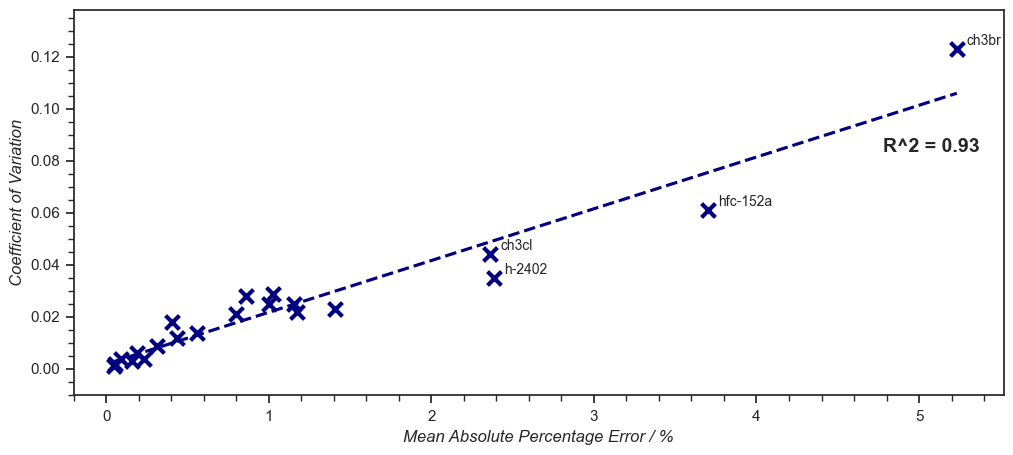

In [135]:
# scatter plot
fig, ax = plt.subplots(figsize=(12,5))
sns.set_theme(style='ticks', font='Arial')

sns.scatterplot(data=data, x='MAPE', y='CV', s=100, ax=ax, marker='x', linewidth=3, color='navy')

# adding dotted line of best fit
sns.regplot(data=data, x='MAPE', y='CV', scatter=False, ax=ax, ci=None, line_kws={'linestyle':'--'}, color='navy')

# calculating R^2 & adding to plot
r2 = data['MAPE'].corr(data['CV'])**2
plt.text(0.87, 0.63, f'R^2 = {r2:.2f}', fontsize=14, transform=ax.transAxes, fontweight='bold')

# adding labels to points if MAPE > 2 or CV > 0.2
for i, txt in enumerate(data.index):
    if data['MAPE'].iloc[i] > 2:
        ax.annotate(txt, (data['MAPE'].iloc[i], data['CV'].iloc[i]), 
                    fontsize=10, xytext=(7,3), textcoords='offset points')
        
plt.xlim(-0.2, 5.52)
plt.ylim(-0.01, 0.138)
plt.xlabel('Mean Absolute Percentage Error / %', fontsize=12, fontstyle='italic')
plt.ylabel('Coefficient of Variation', fontsize=12, fontstyle='italic')

### 2 - Mace Head RF v NN Histogram

In [40]:
mhd_bins = pd.read_csv('data/MHD_mape.csv')

# shaping
mhd_bins_melted = mhd_bins.melt(id_vars='ranges', value_vars=['rf', 'nn'], var_name='Model', value_name='Frequency')
mhd_bins_melted['Model'] = mhd_bins_melted['Model'].replace({'rf': 'Random Forest', 'nn': 'Neural Network'})

mhd_bins

,ranges,bins,rf,nn
0,"[0, 0.25]",0.25,15,17
1,"[0.25, 0.5]",0.50,6,4
2,"[0.5, 0.75]",0.75,2,3
3,"[0.75, 1]",1.00,1,1
4,>1,NaN,2,1


Text(0, 0.5, 'Frequency')

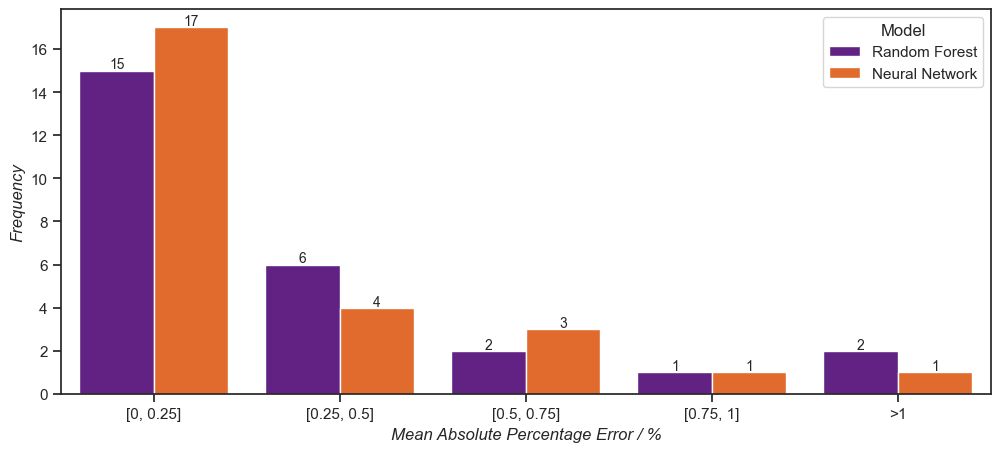

In [73]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_theme(style='ticks', font='Arial')
ax.minorticks_off()

sns.barplot(data=mhd_bins_melted, x='ranges', y='Frequency', hue='Model', ax=ax, palette=['#651195', '#FF620E'])

# adding labels to bars
for i, txt in enumerate(mhd_bins['rf']):
    if txt > 0 and txt < 10:
        ax.text(i-0.22, txt+0.1, txt, fontsize=10)
    elif txt > 10:
        ax.text(i-0.24, txt+0.1, txt, fontsize=10)

for i, txt in enumerate(mhd_bins['nn']):
    if txt > 0 and txt < 10:
        ax.text(i+0.18, txt+0.1, txt, fontsize=10)
    elif txt > 10:
        ax.text(i+0.16, txt+0.1, txt, fontsize=10)


plt.xlabel('Mean Absolute Percentage Error / %', fontsize=12, fontstyle='italic')
plt.ylabel('Frequency', fontsize=12, fontstyle='italic')

### 3 - Gosan RF v NN Histogram

In [67]:
gsn_bins = pd.read_csv('data/GSN_mape.csv')

# shaping
gsn_bins_melted = gsn_bins.melt(id_vars='ranges', value_vars=['rf', 'nn'], var_name='Model', value_name='Frequency')
gsn_bins_melted['Model'] = gsn_bins_melted['Model'].replace({'rf': 'Random Forest', 'nn': 'Neural Network'})

gsn_bins

,ranges,bins,rf,nn
0,"[0, 1]",1.0,9,12
1,"[1, 2]",2.0,6,5
2,"[2, 3]",3.0,2,2
3,"[3, 5]",5.0,0,1
4,>5,NaN,4,1


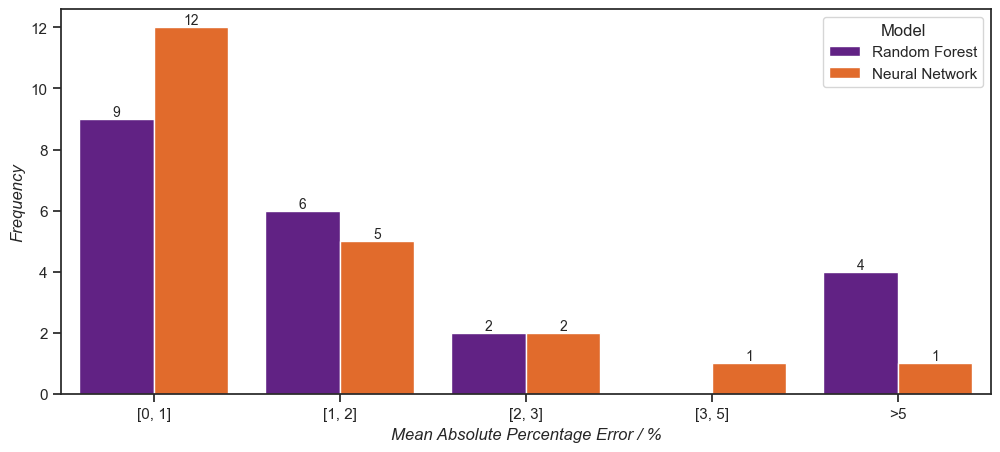

In [74]:
# plotting
fig, ax = plt.subplots(figsize=(12,5))
sns.set_theme(style='ticks', font='Arial')
ax.minorticks_off()

sns.barplot(data=gsn_bins_melted, x='ranges', y='Frequency', hue='Model', ax=ax, palette=['#651195', '#FF620E'])


# adding labels to bars
for i, txt in enumerate(gsn_bins['rf']):
    if txt > 0 and txt < 10:
        ax.text(i-0.22, txt+0.1, txt, fontsize=10)
    elif txt > 10:
        ax.text(i-0.24, txt+0.1, txt, fontsize=10)
    
for i, txt in enumerate(gsn_bins['nn']):
    if txt > 0 and txt < 10:
        ax.text(i+0.18, txt+0.1, txt, fontsize=10)
    elif txt > 10:
        ax.text(i+0.16, txt+0.1, txt, fontsize=10)

plt.xlabel('Mean Absolute Percentage Error / %', fontsize=12, fontstyle='italic')
plt.ylabel('Frequency', fontsize=12, fontstyle='italic')

plt.show()

### 4 - Monthly Anomaly Distribution Plot

In [33]:
# importing in anomalous month data
data = pd.read_csv('data/anomalous_months.csv', index_col='Month')

data

,Total,MHD,GSN
Month,,,
Jan,3,1,2
Feb,12,3,9
March,7,2,5
April,36,20,16
May,76,21,55
June,7,7,0
July,26,11,15
Aug,21,0,21
Sep,11,3,8


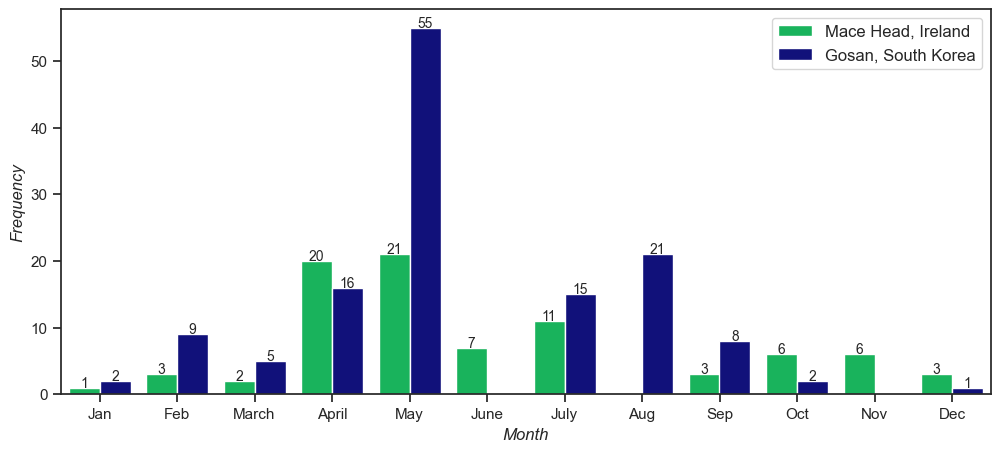

In [34]:
# reshaping data for two series bar plot
data['Month'] = data.index
data_melted = data.melt(id_vars='Month', value_vars=['MHD', 'GSN'], var_name='Location', value_name='Frequency')
data_melted['Location'] = data_melted['Location'].replace({'MHD': 'Mace Head, Ireland', 'GSN': 'Gosan, South Korea'})

fig, ax = plt.subplots(figsize=(12,5))
sns.set_theme(style='ticks', font='Arial')
ax.minorticks_off()

sns.barplot(data=data_melted, x='Month', y='Frequency', hue='Location', ax=ax, palette=[(0, 0.8, 0.35), 'darkblue'])


# adding data labels
for i, txt in enumerate(data['MHD']):
    if txt > 0 and txt < 10:
        ax.text(i-0.25, txt+0.1, txt, fontsize=10)
    elif txt > 10:
        ax.text(i-0.3, txt+0.1, txt, fontsize=10)

for i, txt in enumerate(data['GSN']):
    if txt > 0 and txt < 10:
        ax.text(i+0.15, txt+0.1, txt, fontsize=10)
    elif txt > 10:
        ax.text(i+0.1, txt+0.1, txt, fontsize=10)


plt.xlabel('Month', fontsize=12, fontstyle='italic')
plt.ylabel('Frequency', fontsize=12, fontstyle='italic')

plt.legend(fontsize=12)